![jpeg](../galleries/kmeans/2.jpg)

Clustering is one example of Unsupervised Learning. Unsupervised Learning is something that we want to learn from the datasets, eventhough we don't know what to label this particular data. This particular group in the plot,named cluster, is something that we want to learn this lesson. Dimensionality Reduction (PCA) also one of the Unsupervised Learning algorithm that I will be discussed in the future blog.
<!-- TEASER_END -->

In this example, suppose we plot the movies of what Sebastian and Katie like or don't like. As it turns out, they have different taste of movies, hence different type of category. For some company, like Netflix, they want to recommend movies that users like. For that to happen, they want to see which movies the user has been favorited. Then recommend some other movies that fit in to the category. For more information, please check my other [blog post](http://napitupulu-jon.appspot.com/posts/Unsupervised-Learning--Introduction.html).

### K-Means

![jpeg](../galleries/kmeans/3.jpg)

* Introduced K-Means, one of the most famous algorithm of Unsupervised Learning.
* First we randomly place two (or any other number, definitely less than the number of data point, and in this example, intuitively we pick number two) cluster center.
* Next, we're assigning all the data points to whichever cluster closest to them. 
* Then we move into optimize step, where the cluster move to the position closest to all weighted average of distance data points assigned to each cluster.
* Then we're keep iterating assign and optimize until the cluster is no longer move.

### K-Means Limitation

![jpeg](../galleries/kmeans/4.jpg)

The initial position for each of the cluster is random (or we can choose). But the initial position can be greatly decided the outcome of the clustering. It can be as we wanted or it doesn't. Some said that that point, in order for not to be at all random, directly assigned of the exact position of the data.

To solve for this, you can make n-times doing clustering for your data. And pick the cluster by vote.

For more intuition and algorithm for doing this, check my other [blog post](http://napitupulu-jon.appspot.com/posts/K-means-algorithm.html).

To play around in the visualization of K-Means, check this [link](http://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

For setting parameter in sklearn, parameters that we have discussed so far, check [sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

### Mini Project

As usual, because this blog post are the note that I have taken from Udacity course, you can see the link of the course for this note at the bottom of the page. Here I attack some of the problem they have at their mini project.

n this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

In [2]:
%load k_means_cluster.py

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


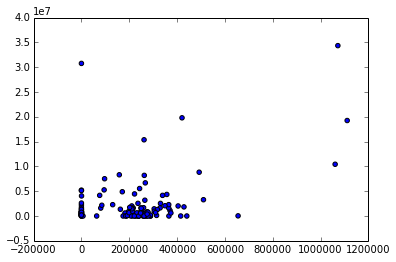

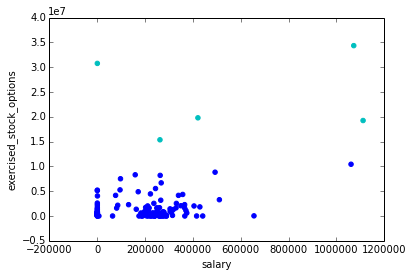

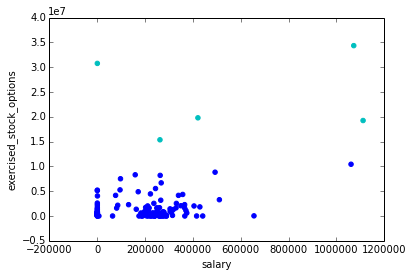

In [5]:
#!/usr/bin/python 

""" 
    skeleton code for k-means clustering mini-project

"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()



from sklearn.cluster import KMeans
features_list = ["poi", feature_1, feature_2]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"







Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

In [6]:
%load k_means_cluster.py

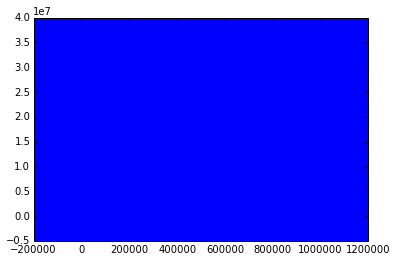

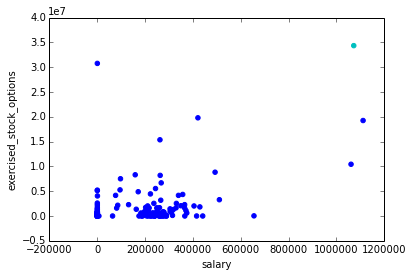

In [11]:
#!/usr/bin/python 

""" 
    skeleton code for k-means clustering mini-project

"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, line below assumes 2 features)
for f1, f2,f3 in finance_features:
    plt.scatter( f1, f2,f3 )
plt.show()



from sklearn.cluster import KMeans
features_list = ["poi", feature_1, feature_2,feature_3]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"







#### 4 points switch clusters

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [13]:
ex_stok = []
for users in data_dict:
    val = data_dict[users]["exercised_stock_options"]
    if val == 'NaN':
        continue
    ex_stok.append(val)
print max(ex_stok)
print min(ex_stok)
    

34348384
3285


What are the maximum and minimum values taken by “salary”?

In [15]:
salary = []
for users in data_dict:
    val = data_dict[users]["salary"]
    if val == 'NaN':
        continue
    salary.append(val)
    
print max(salary)
print min(salary)

1111258
477


The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?

![jpeg](../galleries/kmeans/5.jpg)

> **REFERENCE**:

> * https://www.udacity.com/course/viewer#!/c-ud120/l-2293728536/e-3009398697/m-3024388568
